# Introduction

The Titanic data Contains demographics and passenger information from 891 of the 2224 passengers and crew on board the Titanic Ship. 
<br/>
Data includes the following details for each of the passengers.

* PassengerId : Unique Numerical ID of the Passenger
* Survived   :     Survival
    (0 = No; 1 = Yes)
* Pclass     :     Passenger Class
    (1 = 1st; 2 = 2nd; 3 = 3rd)
* Name       :     Name
* Sex        :     Sex
* Age        :     Age
* Sibsp      :     Number of Siblings/Spouses Aboard
* Parch      :     Number of Parents/Children Aboard
* Ticket     :     Ticket Number
* Fare       :     Passenger Fare
* Cabin      :     Cabin
* Embarked   :     Port of Embarkation
     (C = Cherbourg; Q = Queenstown; S = Southampton)


## Analyze the data

After analyzing the data, we could answer following set of questions form the data available.

1. What factors made people more likely to survive ?
2. How is Fare related to Pclass ?
3. Does Point to Embarkation had any impact on the survival of a person ?

## Independent Variables

1. Name
2. Age
3. Sex
4. Pclass
5. Embarked



## Dependent Variable
1. Survived
2. Fare

## Loading the Data

In [45]:
# Imports

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

In [46]:
# Load the titanic-data.csv
titanic_df = pd.read_csv('titanic-data.csv')

# preview the data
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [47]:
# Info about the data
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


## Investing the Data

After Investing the data we can see that some of the entries in 'Age', 'Embarked', 'Cabin' Field are not present. We must tackle this problem before doing any kind of operation on the data.


## Missing Embarked field

In [48]:
max_embarking_string = titanic_df['Embarked'].max()

# Replacing the two missing values in Embarked columns with the most occuring one
titanic_df['Embarked'] = titanic_df['Embarked'].fillna(max_embarking_string)

In [49]:
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       891 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


The point of Embarkation was missing for two persons. To complete the data set and remove the null variables, I swapped the null places with most common point of embarkation. Since only two values are missing, the result of this process will not be significant and can be dealt with. This step would result in a symmetrical dataset.

## Missing Age Field

177 Data entries of the Age filed are missing. To prevent the occurance of the null values in this case, we could have filled the empty places with the average of the 'Age' field from the rest of the data. But since the no of such entries is huge, filling the empty places might effect the age dataset in the ways that are unwanted. So we end up not changing the data but dealing with the data as it is. We can work with the data present but we must not alter the behaviour of the 'Age' Field in any way possible.

29.69911764705882

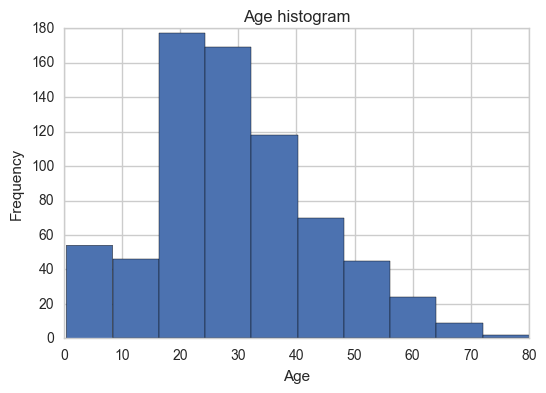

In [50]:
# calculating the mean of Age field
age_mean = titanic_df['Age'].mean()
titanic_df['Age'].hist()
plt.title("Age histogram")
plt.ylabel('Frequency')
plt.xlabel("Age")
age_mean

In [51]:
# titanic_df['Age'] = titanic_df['Age'].fillna(age_mean)
# #print  titanic_df['Age'].mean()
# titanic_df['Age'].hist()
# plt.xlabel('Age')
# plt.title('After fill Age Histogram')

In [52]:
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       891 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


The 177 field of age are still missing. If we try to fill the missing values based on the mean of the age variable, the effect on the age variable is immense. The filling of the values alter the behaviour of the age variable. The effect of this is very evidently seen if we try to plot the age variable before and after the filling process.
<br/>
So we will not alter the age variable. In our upcomming calculations we will overlook the missing values and work only with the values that are already present.

## Cabin

In [53]:
def count(nd):
    if (type(nd) != float):
        return len(nd)

Since we have multiple entries in a single cabin field, this function is to calculate the no of cabin entries povided in a single Cabin Field.
<br/>
We need to calculates the total number of cabin entries that are povided in the whole titanic database.

In [54]:
titanic_df['Cabin'].str.split(pat = ' ').apply(count).sum()

238.0

This command calculate the total number of cabin entries that are mentionde in the Titanic database.
<br/>
So there are only 238 cabin entries in the Titanic Database. A lot of the data is missing and we will have to work with the provided data only. Since it won't be feasable to fill up the rest unmentioned cabin entries, we won't be able to do much of anlaysis using the Cabins.

# Exploration 

## Fare 

## Statistics

In [55]:
titanic_df['Fare'].describe()

count    891.000000
mean      32.204208
std       49.693429
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max      512.329200
Name: Fare, dtype: float64

## Histogram

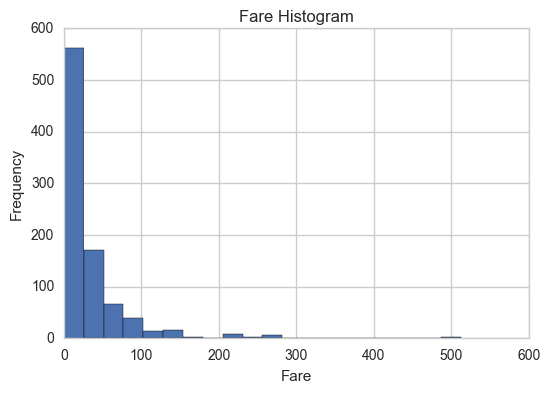

In [56]:
fare_hist = titanic_df['Fare'].hist(bins = 20)
plt.xlabel('Fare')
plt.ylabel('Frequency')
plt.title('Fare Histogram')

The histogram that 0 to 25 seems to be most common or favourite choice for the fare of the ship. Even though there are people who gave more than 200 dolars for the ticket of the ship.

## BoxPlot

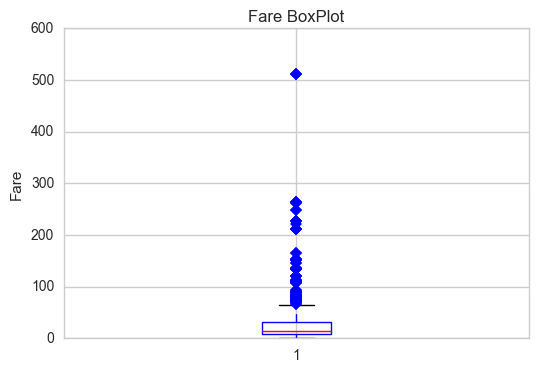

In [57]:
bx_fare = plt.boxplot(titanic_df['Fare'], 0, 'gD')
plt.ylabel('Fare')
plt.title('Fare BoxPlot')

This Box Plot shows that the Fare data contained a lot of outliers. The Titanic Ship's fare  is wide spread. This points to the point that the ship carried the person's from a diversed backgrounds. Majority of the Passengers were form weak financial Backgrounds and weren't able to afford costly tickets.

## Embarked Point

In [58]:
def embarked(df):
    return (df.values[0],  len(df))

In [59]:
embarked_grpd = titanic_df.groupby('Embarked', as_index=False)['Embarked']
embarked_count = embarked_grpd.apply(lambda df: len(df))
embarked_points = embarked_grpd.apply(lambda df: df.values[0])

In [60]:
print embarked_count.values
print embarked_points.values

[168  77 646]
['C' 'Q' 'S']


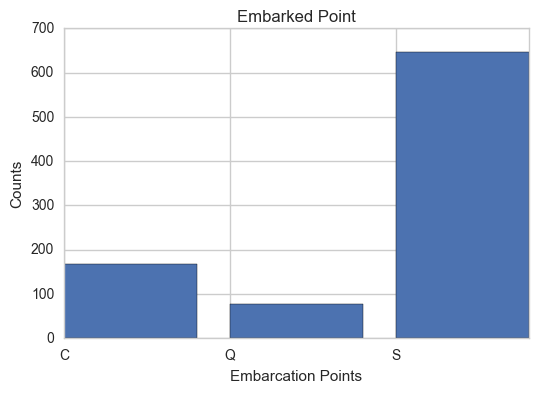

In [61]:
import pylab
x = range(3)
pylab.xticks(x, embarked_points.values)
embarked_plot = plt.bar(x, embarked_count.values,)
plt.xlabel('Embarcation Points')
plt.ylabel('Counts')
plt.title('Embarked Point')

This bar plot shows that from the sample provided majority of the people embarked from point 'S', then from point 'C' and then in the last from point 'Q'.

## Age

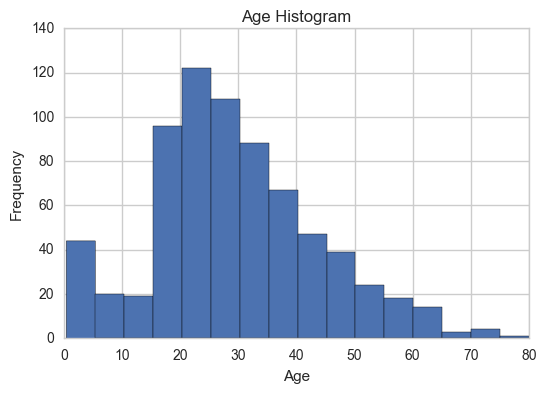

In [62]:
age_hist = titanic_df['Age'].hist(bins=16)
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Age Histogram')

This histogram shows that majority of the populaltion that boarded the ship were young and in 20's to 30. That young people were more inclined to travel by that ship.

## Box Plot

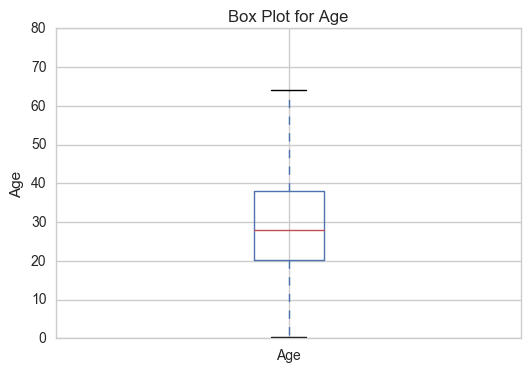

In [63]:
bx_plt = titanic_df['Age'].plot(kind='box')
plt.ylabel('Age')
plt.title('Box Plot for Age')

This Box Plot show that the variation in the age of passengers of the Titanic. Even though the majority of the population lie between 20 to 30, 
the age varied from a new born  to that of a 70 year old person.

## Names

In [64]:
## split split the names in the titanic based on the ','.
names_str_split = titanic_df['Name'].str.split(',')

In [65]:
## create a df of surnames from the split name dataFrame.
surnames = names_str_split.apply(lambda df:df[0])

In [66]:
## find the most common surname among the persons who boarded the ship.
surname_df = pd.DataFrame({'surnames': surnames.values, 'counts':[1] * len(titanic_df)})
surname_df.groupby('surnames', as_index= False).sum().loc[16]

surnames    Andersson
counts              9
Name: 16, dtype: object

This shows that 'Andersson' seems to be the most common surname among the peoples that boarded the ship.

## Pclass

In [67]:
Pclass_1 = titanic_df[titanic_df['Pclass'] == 1]
Pclass_2 = titanic_df[titanic_df['Pclass'] == 2]
Pclass_3 = titanic_df[titanic_df['Pclass'] == 3]

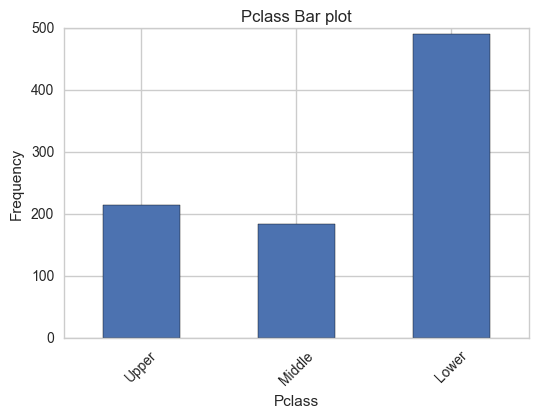

In [68]:
plt.figure()
# Pclass_plot = titanic_df['Pclass'].plot.bar()
# plt.axhline(0, color='k')

# Earlier version
# Pclass_1['Pclass'].hist()
# Pclass_2['Pclass'].hist()
# Pclass_plot = Pclass_3['Pclass'].hist()
# Pclass_plot.legend(["Upper Class", "Middle Class", "Lower Class"], loc='best')

# Recommended Version
titanic_df.groupby('Pclass')['PassengerId'].count().plot(kind='bar')
plt.xticks([0,1,2], ["Upper", "Middle", "Lower"], rotation=45)
plt.xlabel('Pclass')
plt.ylabel('Frequency')
plt.title('Pclass Bar plot')

This histogram shows that the number of persons that belong to Lower Social and Economic Background boarded the ship in large number compared to the persons from the Upper and middle Social and Economic Background.

## Tickets

In [69]:
tickets_split = titanic_df['Ticket'].str.split(' ')
#tickets = tickets_split.apply(lambda df: df[len(df) - 1] if (int(df[len(df) - 1]) == False) else int(df[len(df) - 1]))

In [70]:
tickets_split[115]

['STON/O', '2.', '3101294']

## Factors for Survival

## Sex

In [71]:
males_data = titanic_df[titanic_df['Sex'] == 'male']
females_data = titanic_df[titanic_df['Sex'] == 'female']
print len(males_data)
print len(females_data)

577
314


In [72]:
def survival_ratio(df):
    survived = df[df['Survived'] == 1]
    return [len(survived), len(df), (float)(len(survived)) / len(df)]

In [73]:
print survival_ratio(males_data)

[109, 577, 0.18890814558058924]


In [74]:
print survival_ratio(females_data)

[233, 314, 0.7420382165605095]


So a female had a higher chance of surviving than a male.

In [75]:
print survival_ratio(titanic_df)

[342, 891, 0.3838383838383838]


The probability of a survivor being a male.(Bayesian Probability)

In [76]:
male_if_survived =  (survival_ratio(males_data)[2] * (float (577) / 891)) / survival_ratio(titanic_df)[2]

The probability of a survivor being a female.(Bayesian Probability)

In [77]:
female_if_survived = (survival_ratio(females_data)[2] * (float (314) / 891)) / survival_ratio(titanic_df)[2]

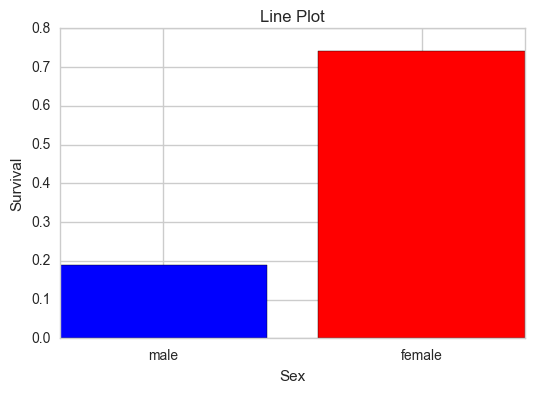

In [78]:
sex = ['male', 'female']
x = range(2)
sex_survival_ratio = [survival_ratio(males_data)[2], survival_ratio(females_data)[2]] 
pylab.xticks(x, sex)

sex_plot = plt.bar(x, sex_survival_ratio, color=['b', 'r'], align='center')
plt.xlabel('Sex')
plt.ylabel('Survival')
plt.title('Line Plot')

This shows the chance of survial of a Male and a Female in the Titanic mishap Graphically.

This analysis shows that among the survivors, there was more than double the chances of a person being a female than the male. This suggests that saving the females was kind of a priority than saving the males or that somehow females were more resilient to the natural conditions on that day than the males.
<br/>
Since the sample size is not big enough, we can't be sure of the accuracy of these results.

## Pclass

In [79]:
lower_class = titanic_df[titanic_df['Pclass'] == 3]
middle_class = titanic_df[titanic_df['Pclass'] == 2]
upper_class = titanic_df[titanic_df['Pclass'] == 1]
print len(lower_class), len(middle_class), len(upper_class)

491 184 216


In [80]:
print survival_ratio (lower_class)
print survival_ratio (middle_class)
print survival_ratio (upper_class)


[119, 491, 0.24236252545824846]
[87, 184, 0.47282608695652173]
[136, 216, 0.6296296296296297]


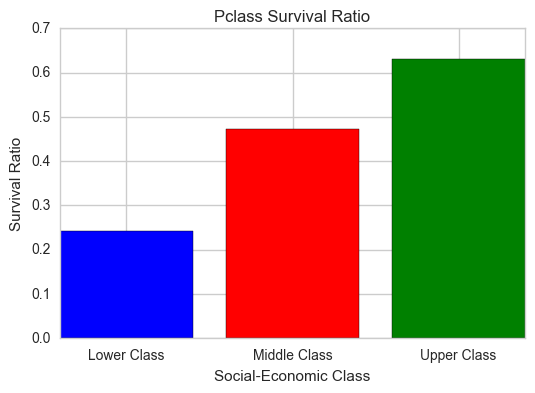

In [81]:
x = range(3)
X_values = ['Lower Class', 'Middle Class', 'Upper Class']
Pclass_survival = [survival_ratio (lower_class)[2], survival_ratio (middle_class)[2], survival_ratio (upper_class)[2]]
pylab.xticks(x, X_values)
plt.bar(x, Pclass_survival, color=['b', 'r', 'g'], align='center')
plt.xlabel('Social-Economic Class')
plt.ylabel('Survival Ratio')
plt.title('Pclass Survival Ratio')

This plot shows that your chances of survival increases with the upgradation of your Social and Economic Class.

So it necessarily means that the Socio-Economic Status did play a role in the Survival of the Passengers. From the data available we can infer that :
<br/>
* A person from Lower Class) had just 24% chance of getting saved or Survival.
* A person form a Middle class had a 47% Chance of getting saved or survival.
* A Perosn form a Upper Class had a staggering 62% Chance of survival.

It shows that a person with more resources, connections and Money had a better chance of survival.


## Parch

In [82]:
## make a group of titanic database based on Parch 
## calculate the survival ratio of each group formed.
Parch_survival_ratio = titanic_df.groupby('Parch').apply(lambda df: survival_ratio(df))

In [83]:
Parch_survival_ratio

Parch
0    [233, 678, 0.343657817109]
1     [65, 118, 0.550847457627]
2                 [40, 80, 0.5]
3                   [3, 5, 0.6]
4                   [0, 4, 0.0]
5                   [1, 5, 0.2]
6                   [0, 1, 0.0]
dtype: object

This shows that having a Parent or child or both aboard on the ship could have increased the chances of survival of that person.

 ## Sibsp

In [84]:
## make a group of titanic database based on Sibsp. 
## calculate the survival ratio of each group formed.
SibSp_survival_ratio = titanic_df.groupby('SibSp').apply(lambda df: survival_ratio(df))

In [85]:
SibSp_survival_ratio

SibSp
0    [210, 608, 0.345394736842]
1    [112, 209, 0.535885167464]
2      [13, 28, 0.464285714286]
3                 [4, 16, 0.25]
4       [3, 18, 0.166666666667]
5                   [0, 5, 0.0]
8                   [0, 7, 0.0]
dtype: object

This shows that having a spouse or a sibling along with the person on the ship increased the chance of survival of that person.

## Parch and Sibsp

Since the no of persons belonging to the category of having 2 to 6 Parents or Child aboard on the ship are less. The population from this sample won't resemble a randon sample but a specific set of persons which is not good for statistical analysis. So we won't include the people's from these categories in our statistical analysis anymore.

Since the he no of persons belonging to the category of having 2 to 8 Spouse or Siblings aboard on the ship are less. The population from this sample won't resemble a randon sample but a specific set of persons which is not good for statistical analysis. So we won't include the people's from these categories in our statistical analysis anymore.

In [86]:
## create a dataFrame that would include the persons that had either no Parch and Sibsp or one Parch and Sibsp.
Parch_df = titanic_df[(titanic_df['Parch'].isin([0,1]))]
Parch_SibSp = Parch_df[Parch_df['SibSp'].isin([0,1])]
len(Parch_SibSp)

755

In [87]:
Parch_Sibsp_survival_df = Parch_SibSp.groupby(['Parch', 'SibSp']).apply(lambda df: survival_ratio(df))
print Parch_Sibsp_survival_df

Parch  SibSp
0      0        [163, 537, 0.303538175047]
       1         [64, 123, 0.520325203252]
1      0          [25, 38, 0.657894736842]
       1           [34, 57, 0.59649122807]
dtype: object


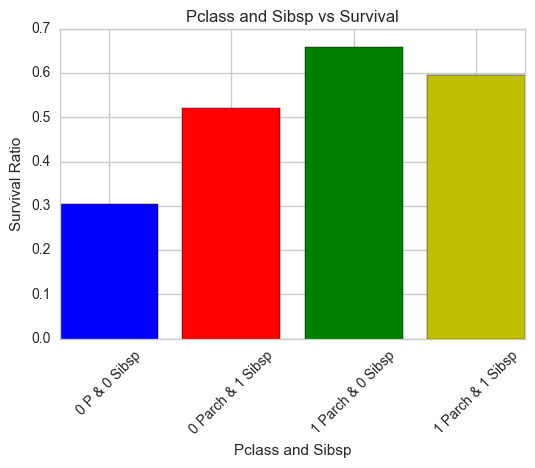

In [88]:
x = range(4)
X_values = ['0 P & 0 Sibsp', '0 Parch & 1 Sibsp', '1 Parch & 0 Sibsp', '1 Parch & 1 Sibsp']
Pclass_Sibsp_survival_ratio = [Parch_Sibsp_survival_df[0][0][2], Parch_Sibsp_survival_df[0][1][2], \
                               Parch_Sibsp_survival_df[1][0][2], Parch_Sibsp_survival_df[1][1][2]]
pylab.xticks(x, X_values, rotation=45) 
plt.bar(x, Pclass_Sibsp_survival_ratio, color=['b', 'r', 'g', 'y'], align='center')
plt.xlabel('Pclass and Sibsp')
plt.ylabel('Survival Ratio')
plt.title('Pclass and Sibsp vs Survival')
#lt.legend(X_values)

This plot clearly shows that the survival chance of an individual increase if he or she has someone (parent, child, spouse or sibling) along with him on the ship. 

The above information states the survival ratio in four instances.
<br/>
* Having no Parent, child, Spouse or Sibling. (A)
* Having one Parent or child and no Spouse or Sibling. (B)
* Having no Parent or child and one Spouse or Sibling. (C)
* Having one Parent or child and one Spouse or Sibling. (D)

survival ratios:
* A = 0.303538175047
* B = 0.657894736842
* C = 0.520325203252
* D = 0.59649122807

Comparing the above results we can clearly see that survival ratio for B,C and D is substantially more than that of A.
Having a Parent or Child and a Spouse or Sibling substantially increases the chance of Survival in the Titanic mishap.

### Finding the significance of Sex and combination of Parch and Sibsp

In [89]:
## create two different df for Males and Females
Parch_SibSp_male = Parch_SibSp[Parch_SibSp['Sex'] == 'male']
Parch_SibSp_female = Parch_SibSp[Parch_SibSp['Sex'] == 'female']
print len(Parch_SibSp_male), len(Parch_SibSp_female)

516 239


In [90]:
## shows the survival ratio of Males based on the Parch and Sibsp.
Parch_SibSp_male.groupby(['Parch', 'SibSp']).apply(lambda df: survival_ratio(df))

Parch  SibSp
0      0        [64, 411, 0.155717761557]
       1         [14, 60, 0.233333333333]
1      0          [4, 14, 0.285714285714]
       1         [14, 31, 0.451612903226]
dtype: object

In [91]:
## shows the survival ratio of Females based on the Parch and Sibsp.
Parch_SibSp_female.groupby(['Parch', 'SibSp']).apply(lambda df: survival_ratio(df))

Parch  SibSp
0      0        [99, 126, 0.785714285714]
       1         [50, 63, 0.793650793651]
1      0                  [21, 24, 0.875]
       1         [20, 26, 0.769230769231]
dtype: object

The effect of Sex and Parch and Sibsp on the chances of Survival
* The above data shows that for a female having a Parent or Child and a Spouse or Sibling didn't affect the chance of survival significantly.
<br/>
* But for a male the chances of survival increased substantially by just having a Parent or child and a Spouse or Sibling.
* By this I can conclude that having a Parent or child and a Spouse or Sibling played it's part in increasing the chances of survival of a Male but not in the case of a Female.


## Fare and Pclass


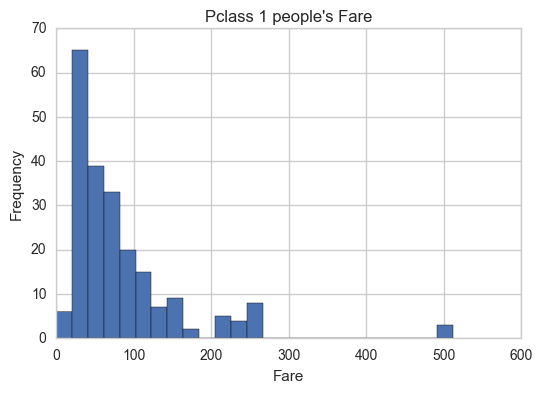

In [92]:
Pclass1_hist = Pclass_1['Fare'].hist(bins = 25);
plt.xlabel('Fare')
plt.ylabel('Frequency')
plt.title('Pclass 1 people\'s Fare')

In [93]:
Pclass_1['Fare'].describe()

count    216.000000
mean      84.154687
std       78.380373
min        0.000000
25%       30.923950
50%       60.287500
75%       93.500000
max      512.329200
Name: Fare, dtype: float64

* This histogram shows that among the people belonging to the Upper class 20 to 100 seems to be most common or most choosen fare for the ticket. 
* It also shows that there were some mega rich persons who were able to pay 200 or 500 price for the ticket of the Titanic Ship.

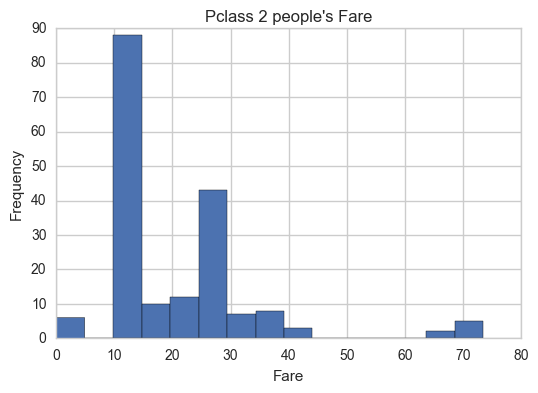

In [94]:
Pclass_2['Fare'].hist(bins = 15)
plt.xlabel('Fare')
plt.ylabel('Frequency')
plt.title('Pclass 2 people\'s Fare')

In [95]:
Pclass_2['Fare'].describe()

count    184.000000
mean      20.662183
std       13.417399
min        0.000000
25%       13.000000
50%       14.250000
75%       26.000000
max       73.500000
Name: Fare, dtype: float64

* The histogram shows that among the people belonging to the middle class 10 to 15 appears to be the most common choice of fare they were willing to pay for the ride in Titanic.
- 20 seems to be the mean price for the population belonging to the Middle class.

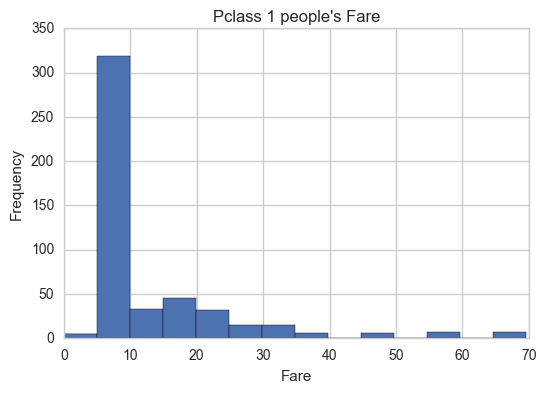

In [96]:
Pclass_3['Fare'].hist(bins = 14)
plt.xlabel('Fare')
plt.ylabel('Frequency')
plt.title('Pclass 1 people\'s Fare')

In [97]:
Pclass_3['Fare'].describe()

count    491.000000
mean      13.675550
std       11.778142
min        0.000000
25%        7.750000
50%        8.050000
75%       15.500000
max       69.550000
Name: Fare, dtype: float64

* The histogram show that among the people belonging to the Lower class 5 to 10 appears to be the most common choice.
* 13 seems to the mean fare price for the population belonging to the lower class.

This analysis shows that fare is somewhat related to the Social Economic status of the person. It simply means tha a person would pay a fare for the ticket of Titanic that would match his Social Economic Status.

## Embarkation and Survival

In [98]:
embarkation_s = titanic_df[titanic_df['Embarked'] == 'S']
embarkation_q = titanic_df[titanic_df['Embarked'] == 'Q']
embarkation_c = titanic_df[titanic_df['Embarked'] == 'C']

In [99]:
survival_ratio(embarkation_s)

[219, 646, 0.33900928792569657]

In [100]:
survival_ratio(embarkation_q)

[30, 77, 0.38961038961038963]

In [101]:
survival_ratio(embarkation_c)

[93, 168, 0.5535714285714286]

This data is pointing to the fact that people embarked from point form 'C' supposedly had a better chance of survival. 
<br/>
There may be a correlation but we can't consider it to be a causation as many lure varaibles are not controlled.

## Age

In [102]:
age_0_to_10 = titanic_df[(titanic_df['Age'] <=10) & (titanic_df['Age'] > 0)]
age_11_to_20 = titanic_df[(titanic_df['Age'] <= 20) & (titanic_df['Age'] > 10)]
age_21_to_30 = titanic_df[(titanic_df['Age'] <= 30) & (titanic_df['Age'] > 20)]
age_31_to_40 = titanic_df[(titanic_df['Age'] <= 40) & (titanic_df['Age'] > 30)]
age_41_to_50 = titanic_df[(titanic_df['Age'] <= 50) & (titanic_df['Age'] > 40)]
age_above_50 = titanic_df[titanic_df['Age'] > 50]

print len(age_0_to_10), len(age_11_to_20), len(age_21_to_30), len(age_31_to_40), len(age_41_to_50), len(age_above_50)

64 115 230 155 86 64


Age is something which can't be ignored when it comes to the factors that could have influenced the survival chance. I have tried to differentiate the population that boarded the ship based on the age interval they belonged to. I have made 6 intervals.
* Age 0 to 10 
* Age 11 to 20 
* Age 21 to 30 
* Age 31 to 40 
* Age 41 to 50 
* Age above 50


I have made these intervals to analyze the role of the age in the survival of a person. 

In [103]:
survival_ratio(age_0_to_10)

[38, 64, 0.59375]

In [104]:
survival_ratio(age_11_to_20)

[44, 115, 0.3826086956521739]

In [105]:
survival_ratio(age_21_to_30)

[84, 230, 0.3652173913043478]

In [106]:
survival_ratio(age_31_to_40)

[69, 155, 0.44516129032258067]

In [107]:
survival_ratio(age_41_to_50)

[33, 86, 0.38372093023255816]

In [108]:
survival_ratio(age_above_50)

[22, 64, 0.34375]

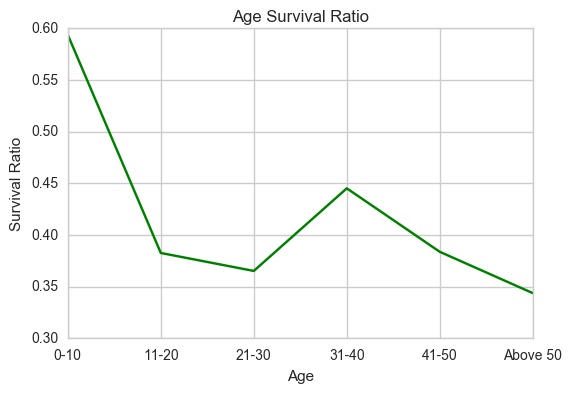

In [109]:
## this line of code collects the survival ratio of all these age interval into a 'age_survival_ratio' List
age_survival_ratio = [survival_ratio(age_0_to_10)[2], survival_ratio(age_11_to_20)[2], survival_ratio(age_21_to_30)[2],\
                           survival_ratio(age_31_to_40)[2], survival_ratio(age_41_to_50)[2], survival_ratio(age_above_50)[2]]

x = range(6)
X_values = ['0-10', '11-20', '21-30', '31-40', '41-50', 'Above 50']
pylab.xticks(x,X_values)
plt.plot(x, age_survival_ratio, 'g')
plt.xlabel('Age')
plt.ylabel('Survival Ratio')
plt.title('Age Survival Ratio')

The above plot shows some very interesting aspects about the survival of a person and their age. 
* The survival ratio of childrens from age 0 till 10 years seems to be the highest. This could be dute to the fact that saving the newborn and children of smaller age was kind of given a preference. 
* The survival ratio of teenagers fells drastically as compared to the very young childrens. 
* The survival raito of young adults (21 to 30) seems to be the lowest of all.
* The survival ratio of adults from 31 to 40 very more likey to be saved than the persons from (21 to 30) or (41 to 50). In my opinion it is due to the fact they had been working for some time now and had saved a lot of money which when combined with the 
fact they still had a lot of years to live made them more likely to survive.
* The survival ratio of persons belonging to (41 to 50) and above 50 continues to fall. It may be due to the fact that even though they might have had a lot of money, their days to live were outnumbered and hence there were less instances of their survival.

# Conclusion


Before starting my analysis on this data set, I had a hypothesis that 
* somehow sex and age might have played a significant role in the survival of an individual. 
* Price of the ticket payed by an individual depended on the Social and economic class of that person.

I founded that the survival of a person was likely to be affected by the following factors:
* Sex
* Age
* Embarkation Point
* Pclass
* Parch and Sibsp

All of these factors seem to have some effect on the survival chances of an individual in the Titanic Ship mishap. Even though some factors seem to have enough correlation to be considered as a causation, but we can't be sure of it. There are so many other factors or lure variables that are not controlled and hence the result can't be considered as a causation. 
<br/>
It only means that these factors might have played their hand in the survival chance of an individual but we can't be sure of it.

<br/>
I also founded that Pclass and fare do have a kind of correlation. The people from upper class were more inclined to pay a heavy price for ticket. People from lower economic background spent less for the ticket.

The titanic dataset gives very detailed information about the peoples that boarded the ship. Through the dataset provided I able to figure out the average age of individuals on the ship. The survival of an individual gave us some of the very special insights. I founded out what kind of factors were likey to influence the survival of an individual. I found that in these kind of tragerdies, more importance is given for the survival of the females and children. 